## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# this allows plots to appear directly in the notebook
%matplotlib inline

In [8]:
temp_bk = pd.read_csv('/Users/matanefron/ds_class_2017_new/DS-SF-32/lessons/lesson-5/temp_data_clean.csv')
temp_bk.head()

,Station_ID,Series_Number,Date,Temperature_(C),Uncertainty_(C),Observations,Time_of_Observation
0,25398,1,1986.708,26.611,0.0507,30,24
1,25398,1,1986.875,27.593,0.0507,30,24
2,25398,1,1986.958,28.226,0.0499,31,24
3,25398,1,1987.042,27.581,0.0499,31,24
4,25398,1,1987.125,27.996,0.0525,28,24


In [10]:
df = pd.read_csv('/Users/matanefron/ds_class_2017_new/DS-SF-32/lessons/lesson-5/temp_X.csv')
df = df[['Station_ID','Series_Number','Date','X']]
df.head()

,Station_ID,Series_Number,Date,X
0,25398,1,1986.708,79.8998
1,25398,1,1986.875,81.6674
2,25398,1,1986.958,82.8068
3,25398,1,1987.042,81.6458
4,25398,1,1987.125,82.3928


In [12]:
result = pd.merge(temp_bk, df, how='inner', on=['Station_ID', 'Series_Number','Date'])
result.head()



,Station_ID,Series_Number,Date,Temperature_(C),Uncertainty_(C),Observations,Time_of_Observation,X
0,25398,1,1986.708,26.611,0.0507,30,24,79.8998
1,25398,1,1986.875,27.593,0.0507,30,24,81.6674
2,25398,1,1986.958,28.226,0.0499,31,24,82.8068
3,25398,1,1987.042,27.581,0.0499,31,24,81.6458
4,25398,1,1987.125,27.996,0.0525,28,24,82.3928


In [22]:
result=result.rename(columns = {'Temperature_(C)':'temp_c','Uncertainty_(C)':'uncertain_c'})
result.head()

,Station_ID,Series_Number,Date,temp_c,uncertain_c,Observations,Time_of_Observation,X
0,25398,1,1986.708,26.611,0.0507,30,24,79.8998
1,25398,1,1986.875,27.593,0.0507,30,24,81.6674
2,25398,1,1986.958,28.226,0.0499,31,24,82.8068
3,25398,1,1987.042,27.581,0.0499,31,24,81.6458
4,25398,1,1987.125,27.996,0.0525,28,24,82.3928


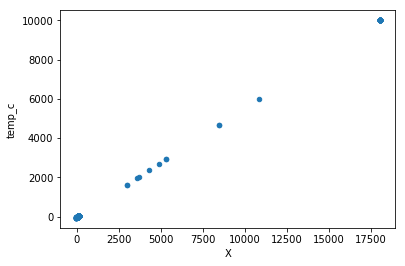

In [32]:
#Plot dist

result.plot(kind='scatter', x='X', y='temp_c')


In [49]:
# run a basci regression
lm = smf.ols(formula='temp_c ~ X', data=result).fit()
lm.params
lm.rsquared
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.685e+32
Date:                Sun, 05 Mar 2017   Prob (F-statistic):               0.00
Time:                        12:18:36   Log-Likelihood:             3.5965e+06
No. Observations:              141637   AIC:                        -7.193e+06
Df Residuals:                  141635   BIC:                        -7.193e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.7778   6.19e-15  -2.87e+15      0.0

# Q: Interpret your coefficients!


# A:for every unit change in X the temp increases by .5556

# Q: What is one potential use for this linear regression equation? 

# A: Converting from one temp measurement to another 

# Q: What does this linear regression mean? 

# A: Variable temp c and X are a linear manipulation of one another 

# Q: Is this a good model? Why or why not? 

# A: no as we are not predicting anything